David Samuel

## url: https://www.komando.com/happening-now/436206/robocalls-worse-than-ever-and-heres-how-to-stop-it

In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
filename = "cleaned.csv"
data = pd.read_csv(filename)
data

,Company_Phone_Number,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall,Area_Code,Prefix,Day_of_Week,Time
0,6614511076,2019-12-13 03:38:28,2019-12-12 14:28:00,Fredericksburg,Virginia,339,Medical & prescriptions,Y,661,451,3,14.47
1,5187043327,2019-12-13 04:48:30,2019-12-07 12:55:00,NaN,Virginia,703,"Reducing your debt (credit cards, mortgage, st...",Y,518,704,5,12.92
2,5123609801,2019-12-13 06:18:48,2019-12-12 19:19:00,NaN,Virginia,703,No Subject Provided,Y,512,360,3,19.32
3,8668500262,2019-12-13 06:19:33,2019-12-12 12:46:00,NaN,Virginia,703,No Subject Provided,Y,866,850,3,12.77
4,7576935121,2019-12-13 06:20:08,2019-12-11 15:56:00,NaN,Virginia,703,No Subject Provided,Y,757,693,2,15.93
5,2393479298,2019-12-13 06:20:55,2019-12-09 17:50:00,NaN,Virginia,703,No Subject Provided,Y,239,347,0,17.83
6,2393479298,2019-12-13 06:21:29,2019-12-09 15:02:00,NaN,Virginia,703,No Subject Provided,Y,239,347,0,15.03
7,9412026818,2019-12-13 06:21:59,2019-12-09 13:58:00,NaN,Virginia,703,No Subject Provided,Y,941,202,0,13.97
8,2393091365,2019-12-13 06:22:31,2019-12-09 12:18:00,NaN,Virginia,703,No Subject Provided,Y,239,309,0,12.30
9,8778591146,2019-12-13 06:23:09,2019-12-09 10:22:00,NaN,Virginia,703,No Subject Provided,Y,877,859,0,10.37


# Important things to note for this datafile

1. Drop Company Phone Number, Created_Date, Violation_Date, Consumer State. We do not need these
2. Change categorical to encoded: City, Subject, Consumer Area Code (for now), Area Code, Prefix (for now).
3. Day_of_Week should be integer. Time is float.

In [3]:
drop_list = ["Company_Phone_Number","Created_Date","Violation_Date","Consumer_State","Recorded_Message_Or_Robocall"]
y_data = data["Recorded_Message_Or_Robocall"]
data_AD = data.drop(drop_list,axis = 1)
data_AD.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
Consumer_City         460 non-null object
Consumer_Area_Code    760 non-null int64
Subject               760 non-null object
 Area_Code            760 non-null int64
 Prefix               760 non-null int64
 Day_of_Week          760 non-null int64
 Time                 760 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 41.6+ KB


Need to replace the Y's and N's in the label to 1's and 0's

In [4]:
y_data
y_data.size
y_data.replace(('Y', 'N'), (1, 0), inplace=True)

Now, we are using the OneHotEncoder

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#Imputer used
imp_string = SimpleImputer(missing_values = np.nan, strategy = "constant", fill_value = "None")
data_AD = imp_string.fit_transform(data_AD)

In [6]:
#Use OneHotEncoder here
enc = OneHotEncoder(sparse=False)
data_AD_1hot = enc.fit_transform(data_AD)
scatterx= data.iloc[:,11]
scattery= data.iloc[:,10]
prefx= data.iloc[:,9]
areax=data.iloc[:,8]
cityx=data.iloc[:,3]

Just making sure everything looks good!! 😀

In [7]:
enc.categories_

[array(['Alexandria', 'Arlington', 'Ashburn', 'Ashland', 'Baskerville',
        'Blue Ridge', 'Bristol', 'CHESTERFIELD', 'Carrollton',
        'Centreville', 'Charlottesville', 'Chesapeake', 'Chester',
        'Church Road', 'Clarksville', 'Danville', 'Dry Fork', 'Dublin',
        'ELLISTON', 'FAIRFAX STATION', 'Fairfax', 'Falls Church',
        'Fishersville', 'Fredericksburg', 'Front Royal', 'GLEN ALLEN',
        'Gainesville', 'Glen Allen', 'Gloucester', 'HAMPTON', 'HAYMARKET',
        'HENRICO', 'Hampton', 'Haymarket', 'Henrico', 'Herndon',
        'Hillsville', 'Hopewell', 'King George', 'Lanexa', 'Leesburg',
        'Linden', 'Locust Grove', 'Lorton', 'Luray', 'MANASSAS',
        'Manassas Park', 'McLean', 'Mclean', 'Mechanicaville',
        'Mechanicsville', 'Midlothian', 'NEWPORT NEWS', 'NORFOLK',
        'NORTH CHESTERFIELD', 'Newport News', 'Nokesville', 'None',
        'Norfolk', 'North Chesterfield', 'POWHATAN', 'Palmyra',
        'Petersburg', 'Portsmouth', 'Pounding mill'

# Data Visualization that we will use for our project

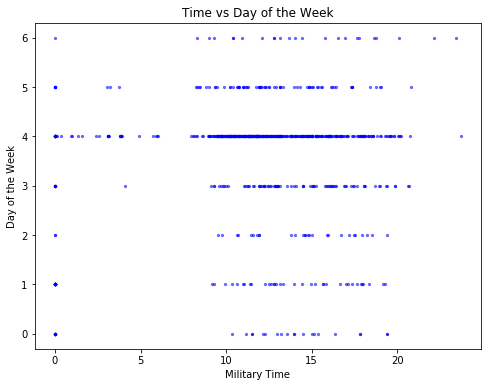

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(scatterx, scattery, s=5, c="blue", alpha=0.5)
plt.title('Time vs Day of the Week')
plt.xlabel('Military Time')
plt.ylabel('Day of the Week')
plt.show()

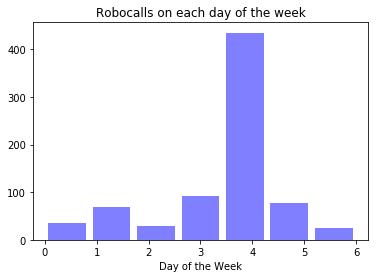

In [9]:
plt.hist(scattery, bins=7, facecolor='blue', alpha=0.5,rwidth=.85)
plt.title('Robocalls on each day of the week')
plt.xlabel('Day of the Week')
plt.show()

# Looking at the graphs above...

We can see that the majority of robocalls occur on a Friday (the largest one points to Friday), and they occur generally during the daytime.

# Models


Linear SVM is first. We found linear SVM to be a great benchmark for other algorithms. However, we ran into a problem of getting a 1.0 for recall when we tuned with the parameters. Our best result is down below.

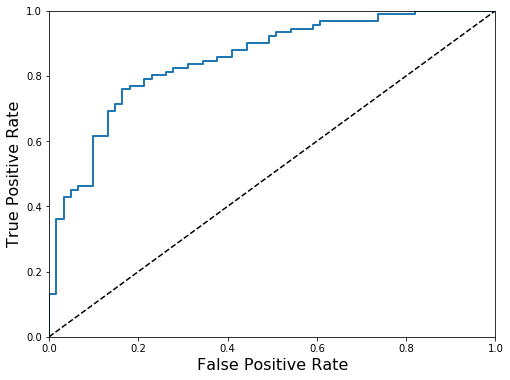

Recall =  0.9010989010989011
Accuracy =  0.743421052631579
F1 score =  0.8078817733990148
Precision =  0.7321428571428571


In [10]:
from sklearn.svm import LinearSVC
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(42)
X_train = []
y_train = []
X_test = []
y_test = []
X_train, X_test, y_train, y_test= train_test_split(data_AD_1hot,y_data, test_size=.2, random_state=42)


#train your svm
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42,tol =1)
xfit = svm_clf.fit(X_train,y_train)

y_score = xfit.decision_function(X_test)
y_pred=xfit.predict(X_test)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,  y_score, pos_label=1)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()
r=recall_score(y_test,y_pred)
print("Recall = " ,r)
a=accuracy_score(y_test,y_pred)
f=f1_score(y_test,y_pred)
print("Accuracy = ",a)
print("F1 score = " ,f)
p= precision_score(y_test, y_pred)
print("Precision = ", p)

This result is actually quite good, considering the number of features we had. The ROC curve looks a little weird, but it overall has great accuracy and F1 score.

# Below is random foresting

In [11]:
from sklearn.ensemble import RandomForestClassifier
lda = LDA(n_components=1)
train_x = lda.fit_transform(X_train, y_train)
test_x = lda.transform(X_test)
param_grid = { 
    'n_estimators': [10,20,50,70,100],
    'max_depth': [2,4,6,8,10],
    'class_weight':['balanced'],
    'min_samples_split':[2,4,6],
}

clf = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_, CV_rfc.best_score_)

clf = RandomForestClassifier( class_weight= 'balanced', max_depth= 10, min_samples_split= 2, 
                             n_estimators= 100, random_state=42)
clf.fit(X_train,y_train)
f1_score(y_test,clf.predict(X_test))


model = clf.fit(X_train,y_train)
#y_score = model.decision_function(X_test)
#model.roc
accuracy = clf.score(X_test,y_test)

y_pred = clf.predict(X_test)
 
f1 = f1_score(y_test,y_pred)
r = recall_score(y_pred,y_test)
p = precision_score(y_pred,y_test)

# fpr, tpr, thresholds = roc_curve(y_test,  y_score, pos_label=1)
# plt.figure(figsize=(8, 6))
# plot_roc_curve(fpr, tpr)

print("This is the accuracy: ",accuracy)
print("This is the f1 score: ", f1)
print("This is the recall: ", r)
print("This is the precision: ",p)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100} 0.7993421052631579
This is the accuracy:  0.7171052631578947
This is the f1 score:  0.7860696517412935
This is the recall:  0.7181818181818181
This is the precision:  0.8681318681318682


# Below is AdaBoosting

This is the accuracy:  0.7171052631578947
This is the f1 score:  0.7839195979899497
This is the recall:  0.7222222222222222
This is the precision:  0.8571428571428571


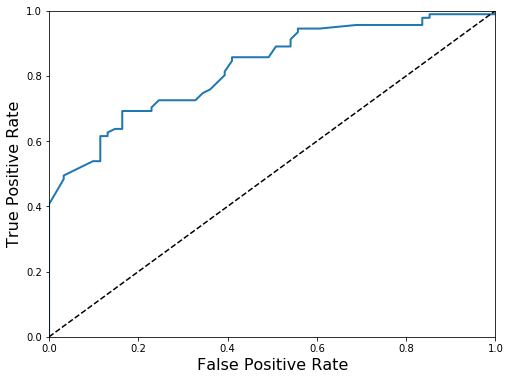

In [12]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=75) #I'm changing this parameter
model = clf.fit(X_train,y_train)

y_score = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test,  y_score, pos_label=1)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

accuracy = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test,y_pred)
r = recall_score(y_pred,y_test)
p = precision_score(y_pred,y_test)
print("This is the accuracy: ",accuracy)
print("This is the f1 score: ", f1)
print("This is the recall: ", r)
print("This is the precision: ",p)

# Below is XGBoost

In [13]:

#from section 9 notebook
n_estimators = [ 50, 100, 200]  
learning_rate = [0.1,0.01,0.001]  

param_grid1 = {'learning_rate':learning_rate, 'n_estimators':n_estimators}
param_grid1

{'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 200]}

In [14]:
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model,param_grid=param_grid1, scoring="accuracy", verbose=1 )
grid_search.fit(X_train, y_train) #Default 3 folds

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [15]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.787828947368421
{'learning_rate': 0.1, 'n_estimators': 100}


In [16]:
#Create a model based on above parameter
model = xgb.XGBClassifier(learning_rate=0.1,n_estimators=100,seed=2017).fit(X_train,y_train)

y_pred = model.predict(X_test)
#evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.5f%%" % (accuracy * 100.0)) 

Accuracy: 71.05263%


# Below is the neural networking within sklearn

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(30,20,5,2), random_state=42)

model = clf.fit(X_train, y_train)

# y_score = model.decision_function(X_test)
# fpr, tpr, thresholds = roc_curve(y_test,  y_score, pos_label=1)
# plt.figure(figsize=(8, 6))
# plot_roc_curve(fpr, tpr)

accuracy = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test,y_pred)
r =recall_score(y_pred,y_test)
p = precision_score(y_pred,y_test)
print("This is the accuracy: ",accuracy)
print("This is the f1 score: ", f1)
print("This is the recall: ", r)
print("This is the precision: ",p)

This is the accuracy:  0.7302631578947368
This is the f1 score:  0.8000000000000002
This is the recall:  0.7192982456140351
This is the precision:  0.9010989010989011


In [18]:
# Below is AdaBoosting